## LGMVIP - DataScience

## Beginner Level Task

## Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM

## Imports Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Creating the LSTM Model

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [8]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


In [9]:
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [12]:
# Adding the output layer
model.add(Dense(units=1))
# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 15s 115ms/step - loss: 0.0121
Epoch 2/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0019
Epoch 13/100

62/62 [==============================] - 7s 115ms/step - loss: 7.2233e-04
Epoch 98/100
62/62 [==============================] - 7s 114ms/step - loss: 7.1039e-04
Epoch 99/100
62/62 [==============================] - 7s 114ms/step - loss: 6.7348e-04
Epoch 100/100
62/62 [==============================] - 7s 114ms/step - loss: 5.9969e-04


In [13]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2018

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Plotting the Results

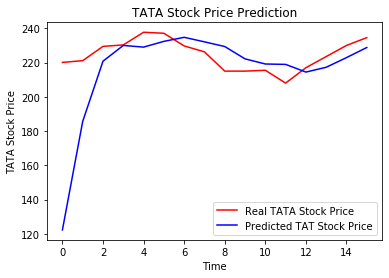

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()